In [16]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import pandas as pd
import random
style.use('fivethirtyeight') # a type of styling for matplotlib


In [61]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r': [[6,5],[7,7],[8,6]]}

new_features = [5,7] # should be classified as type 'r'

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k

    return vote_result, confidence

result, conf = k_nearest_neighbors(dataset, new_features,k=3)
print(result)
print(conf)

r
1.0


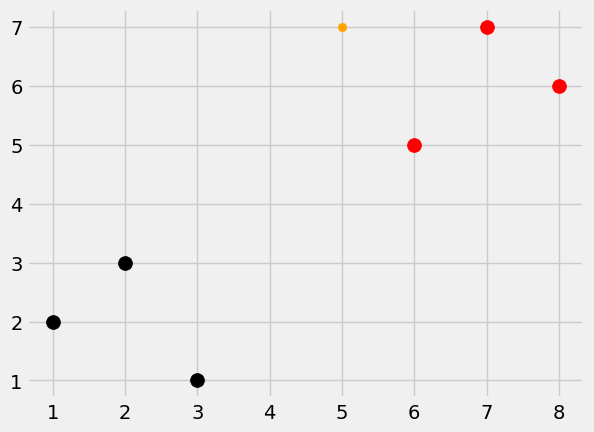

In [53]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset] # has inner foreloop, but is a one liner
plt.scatter(new_features[0], new_features[1], color='orange')
plt.show()

In [65]:
# testing on real dataset
accuracies = []
for i in range(25):
    df = pd.read_csv("breast-cancer-wisconsin.data")
    df.replace('?', -99999, inplace=True)
    df.drop(['id'], 1, inplace=True)
    full_data = df.astype(float).values.tolist()
    # print(full_data[:5])
    random.shuffle(full_data)
    # print(20*'#')
    # print(full_data[:5])

    # doing cross validation by self
    test_size = 0.2
    train_set = {2: [], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])

    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    # run the algorithm, find accuracy
    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors(train_set, data, k=5)
            if group == vote:
                correct += 1
            else:
                print(confidence) # prints confidence of wrongly classified test data
            total += 1

    print('Accuracy', correct/total)
    print('Confidence', confidence)
    accuracies.append(correct/total)

print('Average accuracy', sum(accuracies)/len(accuracies))

# Very similar to accuracy of ski-kit learn's k nearest neighbors!
# But slower in speed :()

/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.6
1.0
0.8
0.8
1.0
0.6
Accuracy 0.9568345323741008
Confidence 0.8
0.8


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


1.0
0.8
Accuracy 0.9784172661870504
Confidence 0.8


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


1.0
0.8
0.8
1.0
Accuracy 0.9712230215827338
Confidence 0.6
0.8


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.6
1.0
0.6
1.0
0.6
Accuracy 0.9568345323741008
Confidence 1.0
0.6


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.8
0.6
0.8
Accuracy 0.9712230215827338
Confidence 1.0


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.6
Accuracy 0.9928057553956835
Confidence 0.8
0.8


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.8
1.0
0.6
1.0
Accuracy 0.9640287769784173
Confidence 0.8


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.6
0.8
0.8
0.6
Accuracy 0.9712230215827338
Confidence 1.0
0.6


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.8
0.6
0.6
0.6
1.0
Accuracy 0.9568345323741008
Confidence 1.0


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.6
0.6
1.0
0.6
Accuracy 0.9712230215827338
Confidence 1.0
0.8


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.6
Accuracy 0.9856115107913669
Confidence 1.0
0.6


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.8
0.8
0.6
0.8
Accuracy 0.9640287769784173
Confidence 1.0
1.0


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.8
1.0
0.6
1.0
1.0
Accuracy 0.9568345323741008
Confidence 1.0


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.6
0.6
0.6
Accuracy 0.9784172661870504
Confidence 1.0
0.6


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.8
0.6
0.8
Accuracy 0.9712230215827338
Confidence 1.0
0.6
0.8
1.0


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.8
0.6
0.6
Accuracy 0.9568345323741008
Confidence 1.0


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.8
1.0
0.8
1.0
0.6
1.0
Accuracy 0.9568345323741008
Confidence 1.0
0.8
1.0


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


1.0
0.6
0.8
1.0
0.6
Accuracy 0.9496402877697842
Confidence 1.0
1.0


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


Accuracy 0.9928057553956835
Confidence 1.0
0.8


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.6
1.0
0.6
1.0
0.6
Accuracy 0.9568345323741008
Confidence 1.0


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.6
1.0
0.8
0.6
Accuracy 0.9712230215827338
Confidence 1.0
0.6


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.6
1.0
0.6
1.0
1.0
Accuracy 0.9568345323741008
Confidence 0.6
0.6


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


1.0
1.0
0.8
1.0
0.6
1.0
Accuracy 0.9496402877697842
Confidence 1.0
0.8


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


0.8
0.6
0.6
Accuracy 0.9712230215827338
Confidence 0.8


/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_95816/3162063263.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


1.0
1.0
0.8
0.8
Accuracy 0.9712230215827338
Confidence 1.0
Average accuracy 0.9671942446043166
